# PLUMBER land surface model comparison project
The Protocol for the Analysis of Land Surface Models (PALS) Land Surface Model Benchmarking Evaluation Project (PLUMBER) was designed to be a land surface model (LSM) benchmarking intercomparison (Best et al., 2015). Thirteen Land Surface Models were compared across 20 different sites across the world (Figure and Table below from Best et al., 2015).

The PLUMBER experiment showed **that** models behave differently and created a motivation to find out **why** models behave differently. In this assignment you will use the Structure for Unifying Multiple Modelling Alternatives (Clark et al., 2015a, b) to investigate modelling decisions related to canopy processes and make a few steps towards answering the why-question.

<div>
<img src="./img/plumber_figure.png" width="750"/>
</div>

<div>
<img src="./img/plumber_table.png" width="750"/>
</div>

## References
Best, M.J., Abramowitz, G., Johnson, H.R., Pitman, A.J., Balsamo, G., Boone, A., Cuntz, M., Decharme, B., Dirmeyer, P.A., Dong, J. and Ek, M., 2015. The plumbing of land surface models: benchmarking model performance. Journal of Hydrometeorology, 16(3), pp.1425-1442.

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Rasmussen, R. M. (2015a). A unified approach for process-based hydrologic modeling: 1. Modeling concept. Water Resources Research, 51(4), 2498–2514. https://doi.org/10.1002/2015WR017198

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Marks, D. G. (2015b). A unified approach for process-based hydrologic modeling: 2. Model implementation and case studies. Water Resources Research, 51, 2515–2542. https://doi.org/10.1002/2015WR017200

Clark, M. P., Zolfaghari, R., Green, K. R., Trim, S., Knoben, W. J. M., Bennet, A., Nijssen, B., Ireson, A. and Spiteri, R. J. (under review). Laugh tests for land models. Submitted to Journal of Hydrometerology, 2020.

<br>

## Model setup
We'll first load the required modules.

In [1]:
# modules 
import os
import pysumma as ps
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import textwrap

<br>

Prof. Clark has created three PLUMBER-specific lookup tables for question 4 of this exercise. These bear the names `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` respectively, Due to the experiment-specific nature of the `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` lookup tables, we'll need to notify pysumma that these lookup tables are available. Run the code below to do this.

In [2]:
# Update the Lookup table decision
ps.decisions.DECISION_META['vegeParTbl']['options'].append('plumberCABLE')
ps.decisions.DECISION_META['vegeParTbl']['options'].append('plumberCHTESSEL')
ps.decisions.DECISION_META['vegeParTbl']['options'].append('plumberSUMMA')

<br>

Now we can setup a pysumma simulation object. We'll abitrarily select the Amplero PLUMBER site as our default simulation.

In [3]:
# SUMMA.exe location
executable = '/usr/local/bin/summa.exe'

In [4]:
path_base = '/home/jovyan/data/pbhmCourse_student/2_process_based_modelling/'

In [5]:
# Define location of .exe and file manager
file_manager_constant = path_base + 'settings/plumber/Amplero/summa_zFileManager_Amplero.txt'

In [6]:
# Open pysumma simulation object
s_amplero = ps.Simulation(executable, file_manager_constant)

In [7]:
# Make the output directory if it doesn't exist
if not os.path.exists(s_amplero.manager['outputPath'].value):
    os.makedirs(s_amplero.manager['outputPath'].value)

<br>

## Assignment - subjective decisions in canopy processes
The image below is reproduced from Fig. 1 in Clark et al. (under review). The image shows the mass (blue) and energy (red) fluxes in the canopy and the canopy air space. The representation of these fluxes in process-based models is part of the many decisions a modeller makes. In this assigment you will investigate the impact of some of these decisions on the simulations for one or more PLUMBER sites.

<div>
<img src="./img/canopy_fluxes.png" width="750"/>
</div>

### Note on pysumma
In the following, you are asked to change certain values in your pysumma setup. Keep in mind that if you make these changes in the input files in the `settings` folder, you will need to make a new pysumma simulation object to have these changes take effect (`s_amplero = ps.Simulation(executable, file_manager_constant)`). If you instead make the changes to an existing pysumma simulation object, make sure to reset your pysumma simulation object to its base state after each simulation (`s_amplero.reset()`) so that your changes don't accumulate. 

### Note on finding simulated variables
In the following exercises, you are asked to investigate the impact of certain modelling options on model simulations.
Time series of certain simulated variables can be found in the output `.nc` file. You can find the location and name of the output `.nc` file by checking the `manager` option of your pysumma object (e.g. `print(s_amplero.manager)`). 

Interesting variables to investigate are indicated in each exercise. If you want to assess the impact on other simulations variables, you can either select those from the output `.nc` file that gets generated by default, or you can adapt the `Model_Output.txt` file in the `./settings/reynolds/` folder. Re-create your pysumma object afterwards to process changes to the `.txt`! See the SUMMA documentation for further guidance: https://summa.readthedocs.io/en/latest/input_output/SUMMA_input/#output-control-file

<br>

<br>

## Exercise 1: Canopy transmissivity
The canopy can block incoming shortwave radiation (Qswd) from reaching the land surface. Transmission and attentuation of incoming shortwave radiation is controlled by the parametrization chosen to represent this process and the Leaf Area Index of the canopy. We'll focus on the parametrization choice for this assignment. This modelling decision is called `canopySrad` in the SUMMA decision file. 

Use your knowledge of pysumma to:

- Find out what the available parametrizations for `canopySrad` are
- Remove option `noah_mp` because it does not compute our variable of interest
- Run the simulations for your chosen PLUMBER site with the available parametrizations
- Make a graph to show the differences in simulated below canopy shortwave radiation (`scalarBelowCanopySolar`) and comment on the sensitivities. You can compare this with eastimated incoming shortwave radiation above the canopy for referece - this information is stored in the model forcing data as variable `SWRadAtm` but for convenience also generated as part of the SUMMA outputs for this experiment

As an example for the remainder of this exercise, code to run the required simulations for Exercise 1 is provided below. All that's left to complete this exercise is to run the code blocks below and to comment on the differences in snow depth simulation you see. 

#### Exercise 1: Answers

In [81]:
# Find the parametrizations
decision = 'canopySrad'
parametrizations = s_amplero.decisions[decision].available_options.copy()
print(parametrizations)

['noah_mp', 'CLM_2stream', 'UEB_2stream', 'NL_scatter', 'BeersLaw']


In [82]:
# The 'naoh_mp' parametrization option does not compute our variable of interest, `scalarBelowCanopySolar`, so there's no need to include it in the tests
parametrizations.remove('noah_mp')
print(parametrizations)

['CLM_2stream', 'UEB_2stream', 'NL_scatter', 'BeersLaw']


In [10]:
# Do the simulations
for parametrization in parametrizations:
    
    # Print what we're doing
    print('Setting up simulations with parametrization ' + parametrization + ' for ' + decision)
    
    # reset the simulation
    s_amplero.reset()
    
    # Set the model decision
    s_amplero.decisions[decision] = parametrization
    
    # Run the model
    s_amplero.run('local', run_suffix=decision + '_' + parametrization )

Setting up simulations with parametrization CLM_2stream for canopySrad
Setting up simulations with parametrization UEB_2stream for canopySrad
Setting up simulations with parametrization NL_scatter for canopySrad
Setting up simulations with parametrization BeersLaw for canopySrad


In [83]:
# prepare the plot
output_files = [
    path_base + 'output/plumber/Amplero/Amplero__canopySrad_CLM_2stream_timestep.nc',
    path_base + 'output/plumber/Amplero/Amplero__canopySrad_UEB_2stream_timestep.nc',
    path_base + 'output/plumber/Amplero/Amplero__canopySrad_NL_scatter_timestep.nc',
    path_base + 'output/plumber/Amplero/Amplero__canopySrad_BeersLaw_timestep.nc']

In [84]:
# define a plotting function that collects a bunch of commands that need to be repeated to get each simulation into the plot
def aux_plot_1(files,labels):
    
    idx = -1 # label counter
    
    for file in files:
        
        # Increment counter
        idx +=1
        
        # load data
        ds = xr.open_dataset(file).isel(hru=0, gru=0).load() # pre-select the single hru and gru that are within the data
        
        # Plot the observations of first file
        if idx == 0:
            ds['SWRadAtm'].plot(color='k',label='Above canopy forcing')
        
        # Plot data 
        ds['scalarBelowCanopySolar'].plot(label=labels[idx])

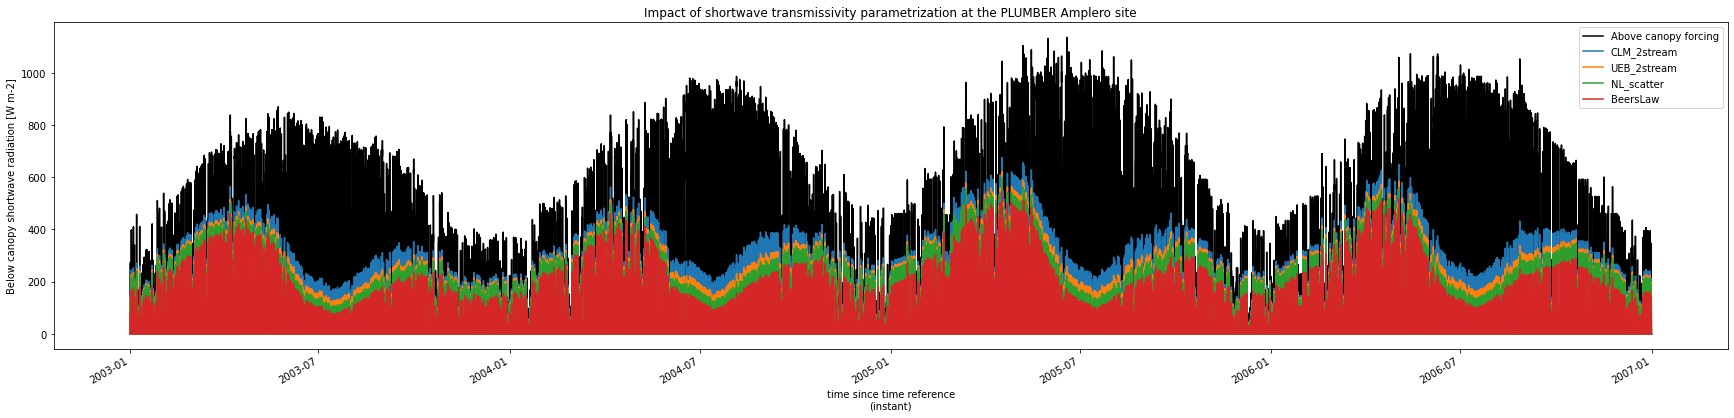

In [87]:
# make the plot
fig = plt.figure(figsize=(30,6))
aux_plot_1(output_files,parametrizations)
plt.legend()
plt.title('Impact of shortwave transmissivity parametrization at the PLUMBER Amplero site')
plt.ylabel('Below canopy shortwave radiation [W m-2]');
fig.savefig('figs/ex1_fig1.pdf', bbox_inches='tight')

<br>
<br>

## Exercise 2: Precipitation partitioning
Precipitation partitioning between canopy interception and throughfall is determined by both the canopy wetting function and the canopy interception capacity. The canopy wetting function is a modelling decision called `cIntercept`. SUMMA lists three options here, but only two are currently implemented. Canopy storage is controlled by parameters `refInterceptCapRain` and `refInterceptCapSnow`:

| Parameter                 | Value        | Min range    | Max range    | Unit | Description
| :-|:-|:-|:-|:-|:-
| refInterceptCapSnow       |       6.6000 |       1.0000 |      10.0000 | kg m-2 | canopy interception capacity per unit leaf area (snow)
| refInterceptCapRain       |       1.0000 |       0.0100 |       1.0000 | kg m-2 | canopy interception capacity per unit leaf area (rain)

Use your knowledge of pysumma to:
- Find out what the available parametrizations for `sIntercept` are
- Do not use parametrization `notPopulatedYet`, for obvious reasons
- Run the simulations for the Amplero site with the other two parametrizations
- Repeat this with several different values for `refInterceptCapRain` and `refInterceptCapSnow`
- Make graphs to show the differences in simulated evaporation (`scalarCanopyEvaporation`) and transpiration (`scalarCanopyTranspiration`), and the difference in simulated throughfall of rain (`scalarThroughfallRain`) and snow (`scalarThroughfallSnow`). Comment on what you see

In [88]:
# reset the simulation
s_amplero.reset()

In [89]:
# canopy wetting function "sIntercept" parametrizations
decision = 'cIntercept'
parametrizations = s_amplero.decisions[decision].available_options.copy()
print(parametrizations)

['sparseCanopy', 'storageFunc', 'notPopulatedYet']


In [90]:
# Remove notPopulatedYet
parametrizations.remove('notPopulatedYet')
print(parametrizations)

['sparseCanopy', 'storageFunc']


In [ ]:
# *************** RUN SIMULATION ******************

In [11]:
# Simulations using the different parametrizations
for parametrization in parametrizations:
    
    # Print what we're doing
    print('Setting up simulations with parametrization ' + parametrization + ' for ' + decision)
    
    # reset the simulation
    s_amplero.reset()
    
    # Set the model decision
    s_amplero.decisions[decision] = parametrization
    
    # Run the model
    s_amplero.run('local', run_suffix=decision + '_' + parametrization )

Setting up simulations with parametrization sparseCanopy for cIntercept
Setting up simulations with parametrization storageFunc for cIntercept


In [ ]:
# *************** RUN SIMULATION ******************

In [25]:
# Simulations using the a range of parameter values

def change_parameters_values(param, sim, exper=0):
    # Experiment with different parameter values
    # exper: int, experiment number
    
    if param=='refInterceptCapSnow':
        # refInterceptCapSnow parameter 
        default, vmin, vmax = sim.global_hru_params[param].value                   # Parameter default value and range
        param_case01 = [1.4, 2.8, 5.2, 9.5]                                        # Parameter new values
        sim.global_hru_params[param].set_value([param_case01[exper], vmin, vmax])  # Put new value in simulation
        
    elif param=='refInterceptCapRain':
        # Case 02: refInterceptCapRain
        default, vmin, vmax = sim.global_hru_params[param].value                   # Parameter default value and range
        param_case02 = [0.06, 0.2, 0.47, 0.89]                                     # Parameter new values
        sim.global_hru_params[param].set_value([param_case02[exper], vmin, vmax])  # Put new value in simulation

experiments = ['ex01', 'ex02', 'ex03', 'ex04']                # experiment ID
parameters = ['refInterceptCapSnow', 'refInterceptCapRain'] 
parameters_short = ['rIntCapSnow', 'rIntCapRain']             # Parameters short name
parametrization = 'storageFunc' 
for pi in range(2):
    for expi in range(4):
        # reset the simulation
        s_amplero.reset()
        
        # Reduce simulation time to one year (to run faster)
        s_amplero.manager['simStartTime'] = '2003-09-01 00:30'
        s_amplero.manager['simEndTime'] = '2004-09-01 00:30'
        
        # Define parameter value
        change_parameters_values(parameters[pi], s_amplero, exper=expi)

        # Set the model decision
        s_amplero.decisions[decision] = parametrization

        # Print what we're doing
        print(decision, '|', parametrization, '|', parameters[pi], '|', experiments[expi], 
              '|', s_amplero.global_hru_params[parameters[pi]].value)

        # Run the model
        s_amplero.run('local', run_suffix=decision + '_' + parametrization + '_' + parameters_short[pi] + experiments[expi] )
        print(s_amplero.status)

cIntercept | storageFunc | refInterceptCapSnow | ex01 | [1.4, 1.0, 10.0]
Success
cIntercept | storageFunc | refInterceptCapSnow | ex02 | [2.8, 1.0, 10.0]
Success
cIntercept | storageFunc | refInterceptCapSnow | ex03 | [5.2, 1.0, 10.0]
Success
cIntercept | storageFunc | refInterceptCapSnow | ex04 | [9.5, 1.0, 10.0]
Success
Success
cIntercept | storageFunc | refInterceptCapRain | ex01 | [0.06, 0.01, 1.0]
Success
Success
cIntercept | storageFunc | refInterceptCapRain | ex02 | [0.2, 0.01, 1.0]
Success
Success
cIntercept | storageFunc | refInterceptCapRain | ex03 | [0.47, 0.01, 1.0]
Success
Success
cIntercept | storageFunc | refInterceptCapRain | ex04 | [0.89, 0.01, 1.0]
Success


In [91]:
# Resulting files organized
output_files = ['Amplero__cIntercept_sparseCanopy_timestep.nc', 'Amplero__cIntercept_storageFunc_timestep.nc']

output_exper_files = {
    'storageFunc':{'refInterceptCapSnow':['Amplero__cIntercept_storageFunc_rIntCapSnowex01_timestep.nc',
                                           'Amplero__cIntercept_storageFunc_rIntCapSnowex02_timestep.nc',
                                           'Amplero__cIntercept_storageFunc_rIntCapSnowex03_timestep.nc',
                                           'Amplero__cIntercept_storageFunc_rIntCapSnowex04_timestep.nc',
                                            
                                          ], 
                    'refInterceptCapRain':['Amplero__cIntercept_storageFunc_rIntCapRainex01_timestep.nc',
                                           'Amplero__cIntercept_storageFunc_rIntCapRainex02_timestep.nc',
                                           'Amplero__cIntercept_storageFunc_rIntCapRainex03_timestep.nc',
                                           'Amplero__cIntercept_storageFunc_rIntCapRainex04_timestep.nc',
                                          ]},
}

In [1]:
# refInterceptCapSnow: experiment values 
param_case01 = [1.4, 2.8, 5.2, 9.5]

# refInterceptCapRain: experiment values
param_case02 = [0.06, 0.2, 0.47, 0.89]

parameters_values = [param_case01, param_case02]

parameters = ['refInterceptCapSnow', 'refInterceptCapRain']
parametrizations = ['sparseCanopy', 'storageFunc']
variables = ['scalarCanopyEvaporation', 'scalarCanopyTranspiration', 'scalarThroughfallRain', 'scalarThroughfallSnow']

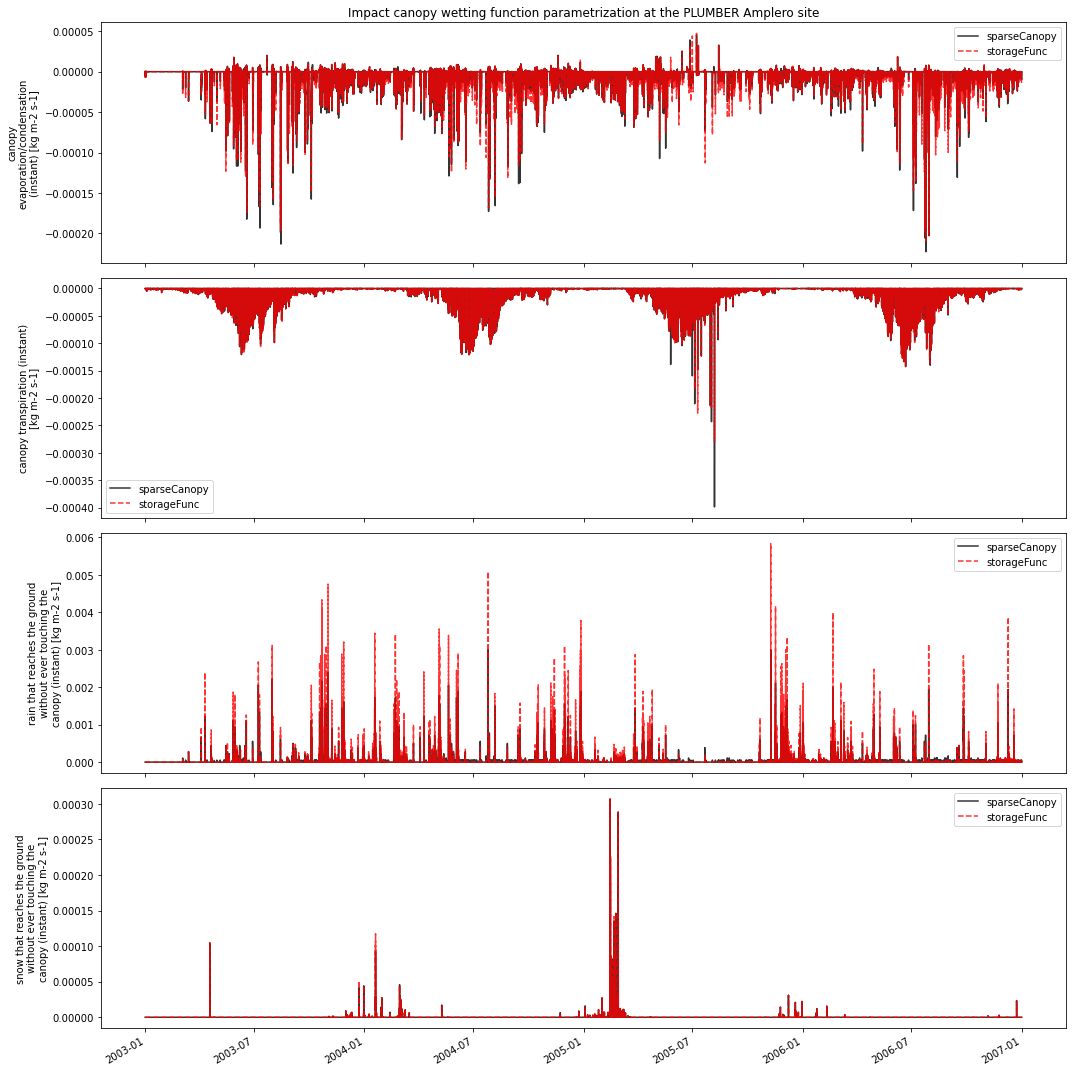

In [93]:
# Impact of changes in the canopy wetting function
colors = ['k', 'r']
styles = ['-', '--']
fig, axes = plt.subplots(len(variables), 1, sharex=True, figsize=(15, 15))
for pi, param in enumerate(parametrizations):
    file = path_base + 'output/plumber/Amplero/' + output_files[pi]  # Get path/file
    ds = xr.open_dataset(file).isel(hru=0, gru=0).load()
    for vi, var in enumerate(variables):
        ax = axes[vi]
        ds[var].plot(ax=ax, label=param, color=colors[pi], ls=styles[pi], alpha=0.8)
        ax.set_xlabel('')
        ax.legend()
        ax.set_title('')
        
axes[0].set_title('Impact canopy wetting function parametrization at the PLUMBER Amplero site')
plt.tight_layout()
fig.savefig('figs/ex2_fig1.pdf', bbox_inches='tight')

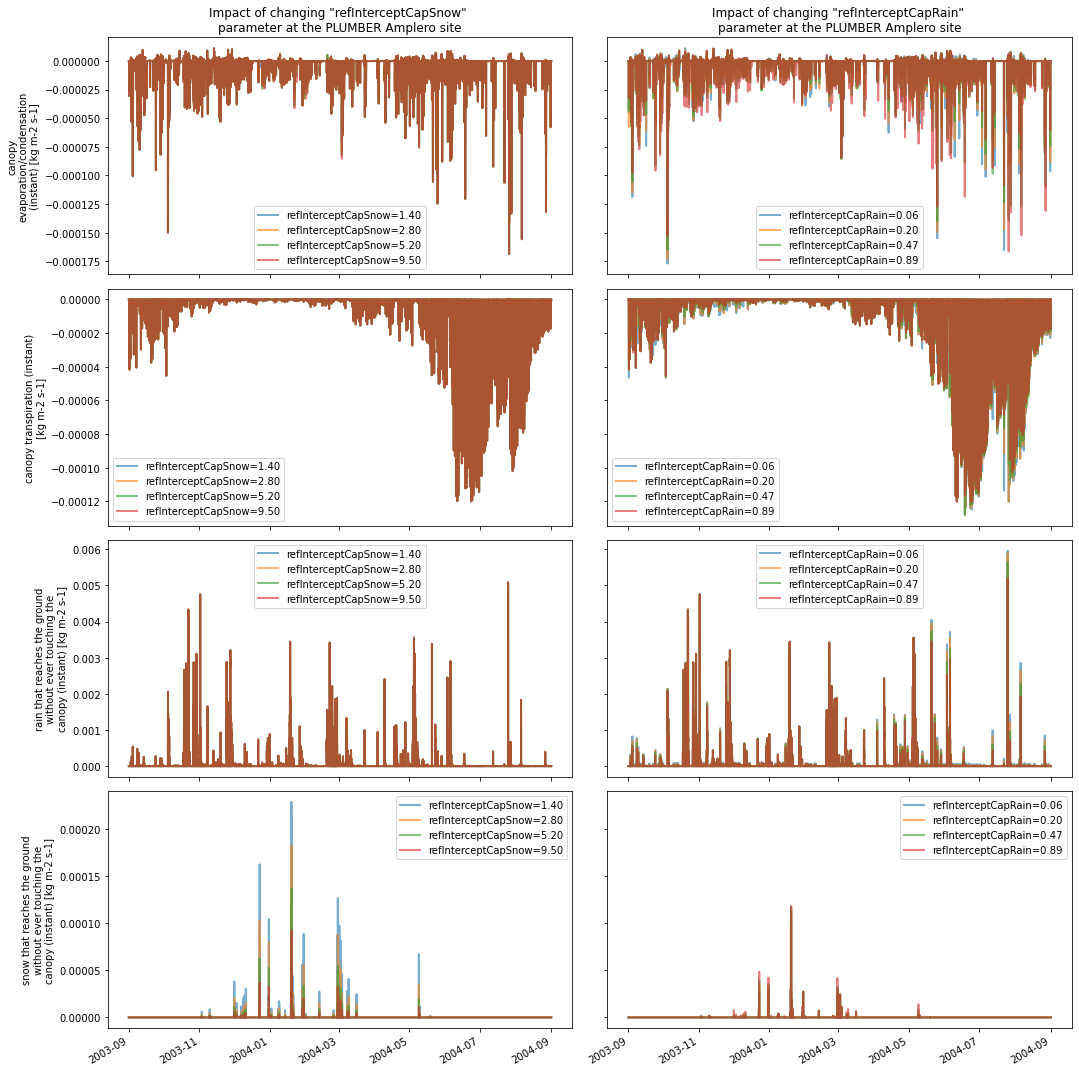

In [95]:
# Impact of different paramter values

fig, axes = plt.subplots(len(variables), 2, sharey='row', sharex=True, figsize=(15, 15))
for pi, param in enumerate(parameters):
    for i, val in enumerate(parameters_values[pi]):
        file = path_base + 'output/plumber/Amplero/' + output_exper_files['storageFunc'][param][i] # Get path/file
        ds = xr.open_dataset(file).isel(hru=0, gru=0).load()        
        for vi, var in enumerate(variables):
            ax = axes[vi, pi]
            ds[var].plot(ax=ax, label=param+'=%.2f'%val, alpha=0.6, lw=2)
            ax.set_xlabel('')
            if pi>0:
                ax.set_ylabel('')
            ax.set_title('')
            ax.legend()

axes[0, 0].set_title('Impact of changing "refInterceptCapSnow" \nparameter at the PLUMBER Amplero site')
axes[0, 1].set_title('Impact of changing "refInterceptCapRain" \nparameter at the PLUMBER Amplero site')

plt.tight_layout()
fig.savefig('figs/ex2_fig2.pdf', bbox_inches='tight')

<br>
<br>

## Exercise 3: Below canopy wind profile 
The choice of vertical wind profile affects the simulated sensible and latent heat fluxes. This modelling decision is called `windPrfile` in the SUMMA decision file. It has two options, `exponential` and `logBelowCanopy`, where the `exponential` profile also relies on a parameter that describes the decline in wind speed:

| Parameter                 | Value        | Min range    | Max range    | Unit | Description
| :-|:-|:-|:-|:-|:-
| windReductionParam        |       0.2800 |       0.0000 |       1.0000 | - | canopy wind reduction parameter

Use your knowledge of pysumma to:

- Run the simulations for your PLUMBER site with both profiles
- Re-run your simulations with the exponential wind profile several times with different values for the wind reduction parameter
- Make a graph to show the differences between the two wind profiles and the impact of the `windReductionParam` parameter. You can look at variables such as sensible heat (`scalarSenHeatTotal`) and surface temperature (`scalarSurfaceTemp`)

In [96]:
# reset the simulation
s_amplero.reset()

In [97]:
# Vertical wind profile "windPrfile" parametrizations
decision = 'windPrfile'
parametrizations = s_amplero.decisions[decision].available_options.copy()
print(parametrizations)

['exponential', 'logBelowCanopy']


In [ ]:
# *************** RUN SIMULATION ******************

In [ ]:
# Simulation using different parameterizations
for parametrization in parametrizations:
    
    # Print what we're doing
    print('Setting up simulations with parametrization ' + parametrization + ' for ' + decision)
    
    # reset the simulation
    s_amplero.reset()
    
    # Set the model decision
    s_amplero.decisions[decision] = parametrization
    
    # Run the model
    s_amplero.run('local', run_suffix=decision + '_' + parametrization )
    print(s_amplero.status)

In [ ]:
# *************** RUN SIMULATION ******************

In [98]:
# Simulation using a range of different parameter values for 'windReductionParam'
param = 'windReductionParam'
param_val, param_min, param_max = s_amplero.global_hru_params[param].value # Default value and range

parametrization = 'exponential'
windReductionParam_values = [0.2, 0.4, 0.6, 0.8]

# Do the simulations
for i, val in enumerate(windReductionParam_values):
    # reset the simulation
    s_amplero.reset()
    
    # Set the model parameter and decision
    s_amplero.global_hru_params[param].set_value([val, param_min, param_max]) # Set new value for parameter
    s_amplero.decisions[decision] = parametrization
    print(decision, '|', parametrization, '|', param, '=', val)
    
    # Run the model
    s_amplero.run('local', run_suffix=decision + '_' + parametrization + '_case0%i' % i) # Add sufix case0i to distinguish btw experiments
    print(s_amplero.status)

windPrfile | exponential | windReductionParam = 0.2
Success
windPrfile | exponential | windReductionParam = 0.4
Success
windPrfile | exponential | windReductionParam = 0.6
Success
windPrfile | exponential | windReductionParam = 0.8
Success


In [98]:
# Resulting files organized
files_windPrfile = ['Amplero__windPrfile_exponential_timestep.nc',
                    'Amplero__windPrfile_logBelowCanopy_timestep.nc']
files_params = ['Amplero__windPrfile_exponential_case00_timestep.nc',
                'Amplero__windPrfile_exponential_case01_timestep.nc',
                'Amplero__windPrfile_exponential_case02_timestep.nc',
                'Amplero__windPrfile_exponential_case03_timestep.nc']


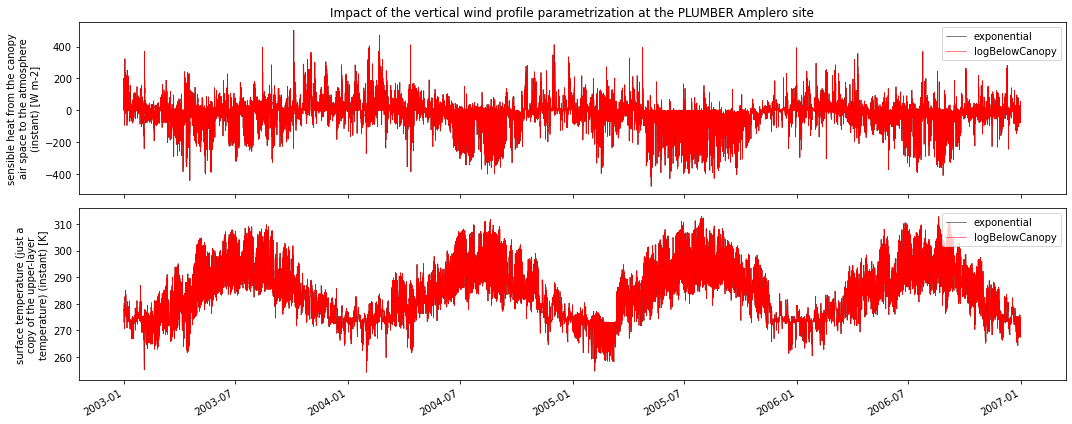

In [100]:
# Plot: Impact of the vertical wind profile parameterization

variables = ['scalarSenHeatTotal', 'scalarSurfaceTemp']
parametrizations = ['exponential', 'logBelowCanopy']
colors = ['k', 'r']

fig, axes = plt.subplots(len(variables), 1, sharex=True, figsize=(15, 6))
for pi, param in enumerate(parametrizations):
    file = path_base + 'output/plumber/Amplero/' + files_windPrfile[pi] # Get path/file
    ds = xr.open_dataset(file).isel(hru=0, gru=0).load()
    for vi, var in enumerate(variables):
        ax = axes[vi]
        ds[var].plot(ax=ax, label=param, color=colors[pi], lw=.5)
        ax.set_xlabel('')
        ax.set_title('')
        ax.legend(loc=1)
axes[0].set_title('Impact of the vertical wind profile parametrization at the PLUMBER Amplero site')
plt.tight_layout()
fig.savefig('figs/ex3_fig1.pdf', bbox_inches='tight')

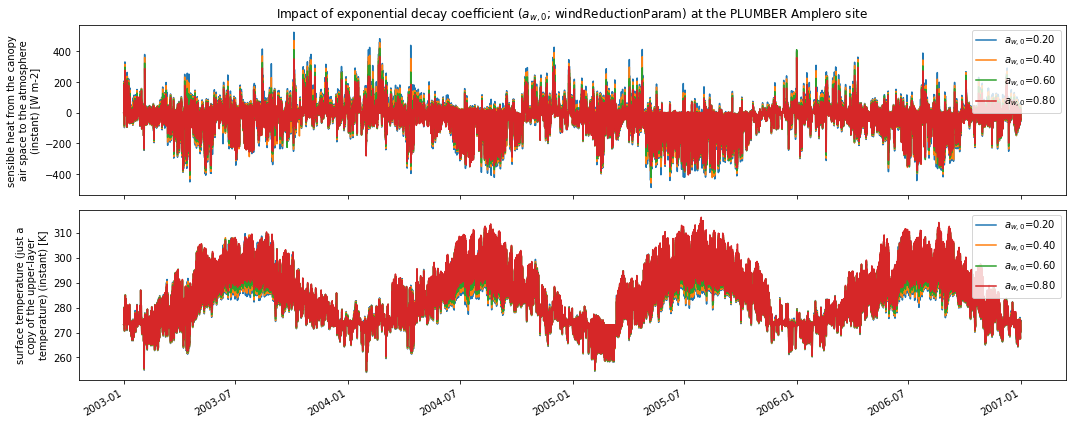

In [101]:
# Plot: Impact of different values for the windReductionParam parameter

variables = ['scalarSenHeatTotal', 'scalarSurfaceTemp']
parametrizations = ['exponential', 'logBelowCanopy']
parametrization = 'exponential'
param = 'windReductionParam'
windReductionParam_values = [0.2, 0.4, 0.6, 0.8]

fig, axes = plt.subplots(len(variables), 1, sharex=True, figsize=(15, 6))
for pi, val in enumerate(windReductionParam_values):    
    file = path_base + 'output/plumber/Amplero/' + files_params[pi] # Get path/file
    ds = xr.open_dataset(file).isel(hru=0, gru=0).load()
    for vi, var in enumerate(variables):
        ax = axes[vi]
        ds[var].plot(ax=ax, label='$a_{w,0}$'+'=%.2f'%val)
        ax.set_xlabel('')
        ax.set_title('')
        ax.legend(loc=1)
axes[0].set_title('Impact of exponential decay coefficient ($a_{w,0}$; windReductionParam) at the PLUMBER Amplero site')
plt.tight_layout()
fig.savefig('figs/ex3_fig2.pdf', bbox_inches='tight')

<br>
<br>

## Exercise 4: Vegetation properties
Canopy interception is partly determined by the specified Leaf Area Index (LAI) and Stem Area Index (SAI). SUMMA has two modelling options available as part of decision `LAI_method`: `monTable` and `specified`. `monTable` uses a lookup table to find LAI values, the choice of which is specified in the `vegeParTbl` modelling decision. Option `specified` instead uses parameter `summerLai` and `winterSAI` values from the global GRU parameter file. For now, we'll focus on the choice of lookup table only.

Prof. Clark has created three PLUMBER-specific lookup tables for this vegetation phenology experiment. These bear the names `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` respectively, where the `plumberSUMMA` table is identical to the default PLUMBER setup we generated at the beginning of this assignment. 

For this exericse, use your knowledge of pysumma to:
- Generate simulations for one of the PLUMBER sites with each of the three phenology options specified above
- Make graphs to show the differences in simulated evaporation (`scalarCanopyEvaporation`) and transpiration (`scalarCanopyTranspiration`), and the difference in simulated throughfall of rain (`scalarThroughfallRain`) and snow (`scalarThroughfallSnow`). Comment on what you see

#### NOTE
Due to the experiment-specific nature of the `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` lookup tables, some remapping of the `vegTypeIndex` parameter is needed. Detailed explanations are beyond the scope of this assignment. Use the code provided below to do the required remapping. To avoid confusion, your code must include:
- a line to change the `vegeParTbl` modelling decision to be one of `plumberCABLE`, `plumberCHTESSEL`, or `plumberSUMMA`
- a line that calls the remap function for your chosen site, e.g. `remap_vegTypeIndex_to_siteIndex(s_amplero,'Amplero')`

You can check if the remapping has been performed correctly by calling `s_amplero.local_attributes['vegTypeIndex'].data[0]` before you run your model simulation. The value returned must match the value in the code below, e.g. for the Amplero site you should see `1`, for Blodgett you should see `2`, etc.

Note that if you reset your simulation object (`s_amplero.reset()`), this will reset __both__ the modelling decision __and__ the remapping. 

In [102]:
# remapping of the `vegTypeIndex` parameter
def remap_vegTypeIndex_to_siteIndex(simulationObject,site):
    
    # Indices of all sites in the `VEGPARM.TBL` and `MPTABLE.TBL` files, for the PLUMBER-specific lookup tables
    siteIndex = {'Amplero':  1,
                'Blodgett':  2,
                'Bugac':     3,
                'ElSaler':   4,
                'ElSaler2':  5,
                'Espirra':   6,
                'FortPeck':  7,
                'Harvard':   8,
                'Hesse':     9,
                'Howard':   10,
                'Howlandm': 11,
                'Hyytiala': 12,
                'Kruger':   13,
                'Loobos':   14,
                'Merbleue': 15,
                'Mopane':   16,
                'Palang':   17,
                'Sylvania': 18,
                'Tumba':    19,
                'UniMich':  20}
    
    # Change the `vegTypeIndex` parameter
    simulationObject.local_attributes['vegTypeIndex'].data[0] = siteIndex[site]
    
    return

In [103]:
# reset the simulation
s_amplero.reset()

In [104]:
# LAI_method parametrizations
decision = 'LAI_method'
parametrizations = s_amplero.decisions[decision].available_options.copy()
print(parametrizations)

['monTable', 'specified']


In [ ]:
# *************** RUN SIMULATION ******************

In [84]:
# Simulation using different phenology optionss
pheno_options = ['plumberCABLE', 'plumberCHTESSEL', 'plumberSUMMA']
decision_table = 'vegeParTbl'
parametrization = 'monTable'

for option in pheno_options:
    
    # reset the simulation
    s_amplero.reset()
    
    # Set the model decision
    s_amplero.decisions[decision] = parametrization
    s_amplero.decisions[decision_table] = option
    
    # remapping of the `vegTypeIndex` parameter
    remap_vegTypeIndex_to_siteIndex(s_amplero,'Amplero')

    # Reduce simulation time to one year (to run faster)
    s_amplero.manager['simStartTime'] = '2003-09-01 00:30'
    s_amplero.manager['simEndTime'] = '2004-09-01 00:30'
    
    print(decision, '|', parametrization, '|', option)
    
    # Run
    s_amplero.run('local', run_suffix=decision + '_' + parametrization + '_' + option)
    print(s_amplero.status)

LAI_method | monTable | plumberCABLE
Success
LAI_method | monTable | plumberCHTESSEL
Success
LAI_method | monTable | plumberSUMMA
Success


In [105]:
# Results organized
output_files = ['Amplero__LAI_method_monTable_plumberCABLE_timestep.nc',
                'Amplero__LAI_method_monTable_plumberCHTESSEL_timestep.nc',
                'Amplero__LAI_method_monTable_plumberSUMMA_timestep.nc'
                ]

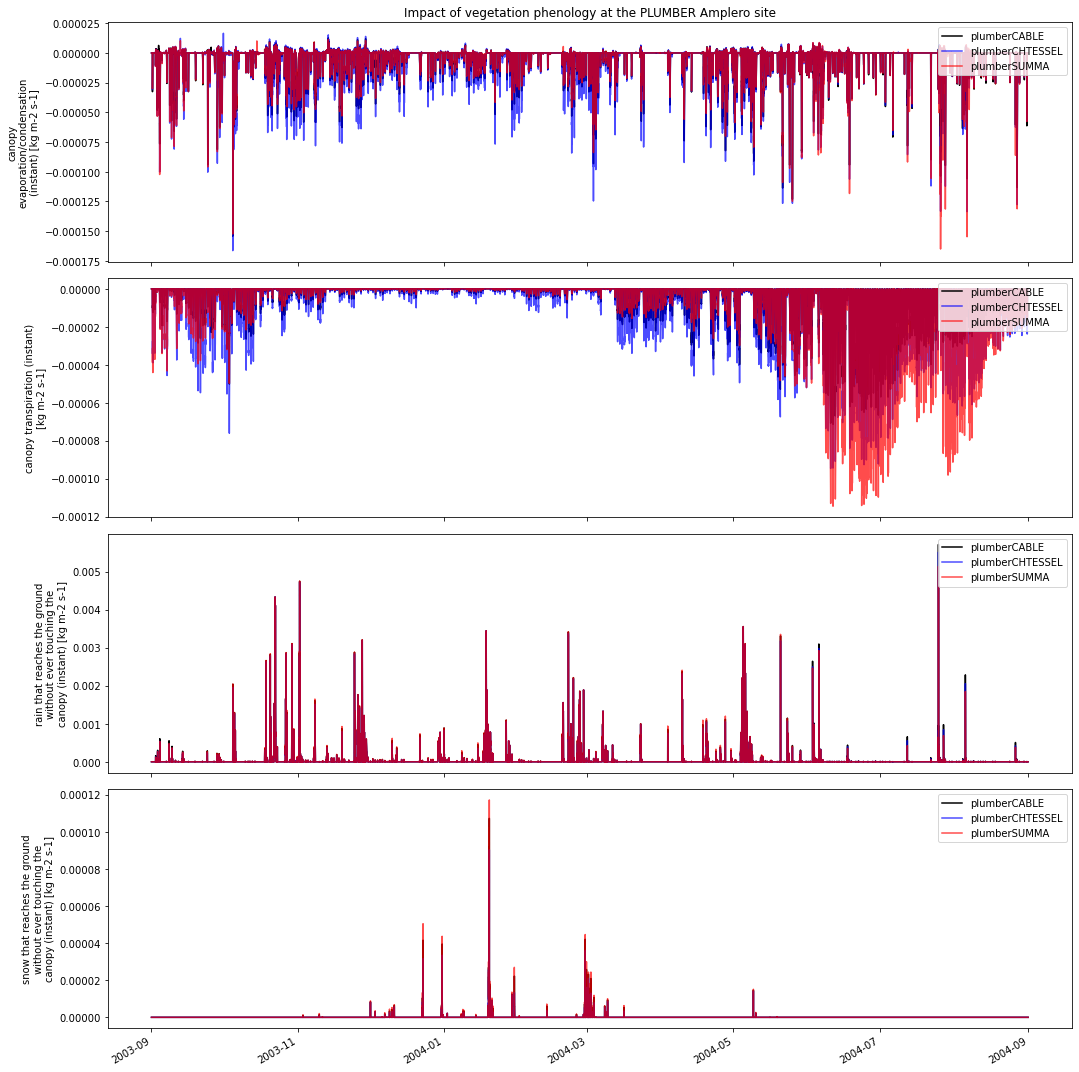

In [108]:
# Plot: Impact of vegetation phenology

variables = ['scalarCanopyEvaporation', 'scalarCanopyTranspiration', 'scalarThroughfallRain', 'scalarThroughfallSnow']
pheno_options = ['plumberCABLE', 'plumberCHTESSEL', 'plumberSUMMA']
decision_table = 'vegeParTbl'
parametrization = 'monTable'
colors = ['k', 'blue', 'red']
styles = ['-', '--', ':']
alphas = [1, 0.7, 0.7]

fig, axes = plt.subplots(len(variables), 1, sharex=True, figsize=(15, 15))
for i, option in enumerate(pheno_options):
    file = path_base + 'output/plumber/Amplero/' + output_files[i]
    ds = xr.open_dataset(file).isel(hru=0, gru=0).load()
    for vi, var in enumerate(variables):
        ax = axes[vi]
        ds[var].plot(ax=ax, label=option, color=colors[i], alpha=alphas[i])
        ax.set_xlabel('')
        ax.set_title('')
        ax.legend(loc=1)
axes[0].set_title('Impact of vegetation phenology at the PLUMBER Amplero site')
plt.tight_layout()
fig.savefig('figs/ex4_fig1.pdf', bbox_inches='tight')